In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("USArrests.csv", sep=',', header=0)
X=data.drop(columns=['State'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
# Convert the scaled features array back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=X.columns)
print("Mean of each variable:")
print(scaled_features_df .mean())
print("\nStandard deviation of each variable:")
print(scaled_features_df .std())



Mean of each variable:
Murder     -7.105427e-17
Assault     1.387779e-16
UrbanPop   -4.396483e-16
Rape        8.593126e-16
dtype: float64

Standard deviation of each variable:
Murder      1.010153
Assault     1.010153
UrbanPop    1.010153
Rape        1.010153
dtype: float64


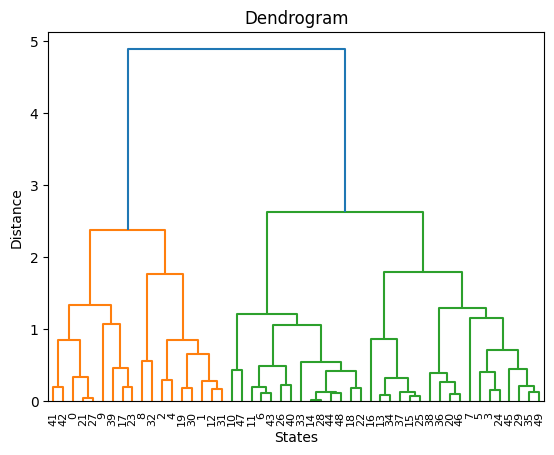

In [19]:
# Perform hierarchical clustering with complete linkage
Z = hierarchy.linkage(X, method='complete')

# Display dendrogram
plt.figure()
dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('States')
plt.ylabel('Distance')
plt.show()


In [28]:
from scipy.cluster.hierarchy import fcluster
# Perform hierarchical clustering with complete linkage
Z = hierarchy.linkage(X, method='complete')

# Cut the dendrogram to obtain three clusters
max_d = 2  # Adjust this threshold to obtain three distinct clusters
clusters = fcluster(Z, max_d, criterion='distance')

# Assign cluster labels to the original data
data['cluster'] = clusters

# Print which states belong to which clusters
for cluster_num in range(1, 4):  # Assuming there are three clusters
    cluster_data = data[data['cluster'] == cluster_num]
    state_names = cluster_data['State'].unique()
    print(f"Cluster {cluster_num} - States: {state_names}")

Cluster 1 - States: ['Alabama' 'Georgia' 'Louisiana' 'Michigan' 'Mississippi' 'Nevada'
 'South Carolina' 'Tennessee' 'Texas']
Cluster 2 - States: ['Alaska' 'Arizona' 'California' 'Florida' 'Illinois' 'Maryland'
 'New Mexico' 'New York' 'North Carolina']
Cluster 3 - States: ['Connecticut' 'Hawaii' 'Idaho' 'Iowa' 'Maine' 'Minnesota' 'Nebraska'
 'New Hampshire' 'North Dakota' 'South Dakota' 'Utah' 'Vermont'
 'West Virginia' 'Wisconsin']


Cluster 1 - States: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


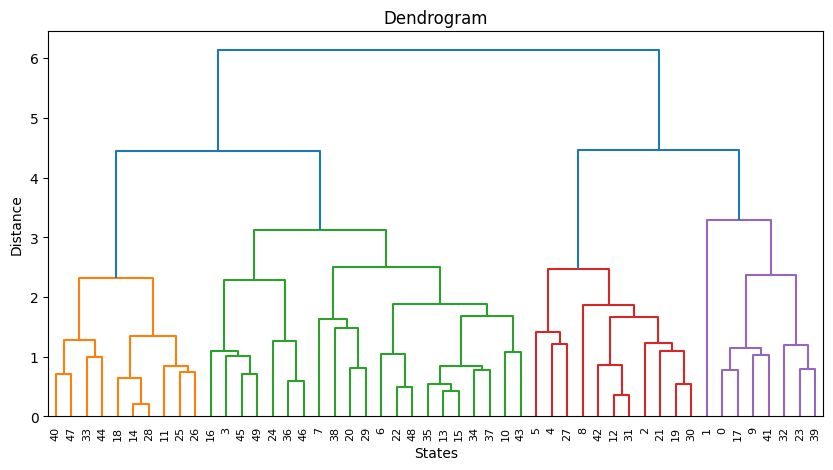

In [30]:
Z = hierarchy.linkage(scaled_features_df, method='complete', metric='euclidean')

# Cut the dendrogram to obtain three clusters
max_d = 10  # Adjust this threshold to obtain three distinct clusters
clusters = fcluster(Z, max_d, criterion='distance')

# Assign cluster labels to the original data
data['cluster'] = clusters

# Print which states belong to which clusters
for cluster_num in range(1, max(clusters) + 1):  # Assuming there are max(clusters) clusters
    cluster_data = data[data['cluster'] == cluster_num]
    state_names = cluster_data['State'].unique()
    print(f"Cluster {cluster_num} - States: {state_names}")

# Plot dendrogram to visualize clusters
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('States')
plt.ylabel('Distance')
plt.show()